In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 8

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 8)                 88        
                                                                 
Total params: 1,158
Trainable params: 1,158
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
32/40 [=======================>......] - ETA: 0s - loss: 2.0452 - accuracy: 0.1501
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
40/40 [==============================] - 3s 22ms/step - loss: 2.0264 - accuracy: 0.1616 - val_loss: 1.8805 - val_accuracy: 0.3025
Epoch 2/1000
32/40 [=======================>......] - ETA: 0s - loss: 1.8817 - accuracy: 0.2373
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
40/40 [==============================] - 0s 10ms/step - loss: 1.8725 - accuracy: 0.2376 - val_loss: 1.7443 - val_accuracy: 0.2996
Epoch 3/1000
32/40 [=======================>......] - ETA: 0s - loss: 1.7837 - accuracy: 0.2666
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
40/40 [==============================] - 0s 9ms/step - loss: 1.7772 - accuracy: 0.2674 - val_loss: 1.6373 - val_accuracy: 0.3233
Epoch 4/1000
33/40 [=======================>......] - ETA: 0s - loss: 1.6978 - accuracy: 0.2910

39/40 [============================>.] - ETA: 0s - loss: 0.9521 - accuracy: 0.6404
Epoch 28: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
40/40 [==============================] - 0s 12ms/step - loss: 0.9518 - accuracy: 0.6408 - val_loss: 0.5545 - val_accuracy: 0.8899
Epoch 29/1000
35/40 [=========================>....] - ETA: 0s - loss: 0.9333 - accuracy: 0.6391
Epoch 29: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
40/40 [==============================] - 0s 12ms/step - loss: 0.9312 - accuracy: 0.6396 - val_loss: 0.5443 - val_accuracy: 0.8917
Epoch 30/1000
38/40 [===========================>..] - ETA: 0s - loss: 0.9280 - accuracy: 0.6369
Epoch 30: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
40/40 [==============================] - 0s 11ms/step - loss: 0.9307 - accuracy: 0.6361 - val_loss: 0.5388 - val_accuracy: 0.8804
Epoch 31/1000
40/40 [==============================] - ETA: 0s - loss: 0.9182 - accuracy: 0.6367
Epoch

Epoch 55/1000
33/40 [=======================>......] - ETA: 0s - loss: 0.8277 - accuracy: 0.6963
Epoch 55: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
40/40 [==============================] - 0s 9ms/step - loss: 0.8222 - accuracy: 0.6951 - val_loss: 0.4112 - val_accuracy: 0.9254
Epoch 56/1000
31/40 [======================>.......] - ETA: 0s - loss: 0.8131 - accuracy: 0.6948
Epoch 56: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
40/40 [==============================] - 0s 10ms/step - loss: 0.7977 - accuracy: 0.7028 - val_loss: 0.4136 - val_accuracy: 0.9295
Epoch 57/1000
37/40 [==========================>...] - ETA: 0s - loss: 0.8264 - accuracy: 0.6852
Epoch 57: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
40/40 [==============================] - 0s 11ms/step - loss: 0.8257 - accuracy: 0.6868 - val_loss: 0.4102 - val_accuracy: 0.9331
Epoch 58/1000
33/40 [=======================>......] - ETA: 0s - loss: 0.8048 - accuracy:

Epoch 82/1000
40/40 [==============================] - ETA: 0s - loss: 0.7719 - accuracy: 0.7144
Epoch 82: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
40/40 [==============================] - 0s 11ms/step - loss: 0.7719 - accuracy: 0.7144 - val_loss: 0.3718 - val_accuracy: 0.9384
Epoch 83/1000
37/40 [==========================>...] - ETA: 0s - loss: 0.7702 - accuracy: 0.7105
Epoch 83: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
40/40 [==============================] - 0s 11ms/step - loss: 0.7681 - accuracy: 0.7105 - val_loss: 0.3758 - val_accuracy: 0.9313
Epoch 84/1000
32/40 [=======================>......] - ETA: 0s - loss: 0.7452 - accuracy: 0.7263
Epoch 84: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
40/40 [==============================] - 0s 11ms/step - loss: 0.7534 - accuracy: 0.7207 - val_loss: 0.3716 - val_accuracy: 0.9236
Epoch 85/1000
32/40 [=======================>......] - ETA: 0s - loss: 0.7782 - accuracy

Epoch 109/1000
38/40 [===========================>..] - ETA: 0s - loss: 0.7340 - accuracy: 0.7336
Epoch 109: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
40/40 [==============================] - 0s 11ms/step - loss: 0.7348 - accuracy: 0.7328 - val_loss: 0.3496 - val_accuracy: 0.9349
Epoch 110/1000
31/40 [======================>.......] - ETA: 0s - loss: 0.7568 - accuracy: 0.7200
Epoch 110: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
40/40 [==============================] - 0s 10ms/step - loss: 0.7616 - accuracy: 0.7229 - val_loss: 0.3451 - val_accuracy: 0.9402
Epoch 111/1000
33/40 [=======================>......] - ETA: 0s - loss: 0.7406 - accuracy: 0.7270
Epoch 111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
40/40 [==============================] - 0s 12ms/step - loss: 0.7380 - accuracy: 0.7300 - val_loss: 0.3482 - val_accuracy: 0.9295
Epoch 112/1000
38/40 [===========================>..] - ETA: 0s - loss: 0.7646 - a

Epoch 136/1000
38/40 [===========================>..] - ETA: 0s - loss: 0.7462 - accuracy: 0.7354
Epoch 136: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
40/40 [==============================] - 0s 11ms/step - loss: 0.7475 - accuracy: 0.7346 - val_loss: 0.3432 - val_accuracy: 0.9313
Epoch 137/1000
33/40 [=======================>......] - ETA: 0s - loss: 0.7097 - accuracy: 0.7382
Epoch 137: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
40/40 [==============================] - 0s 9ms/step - loss: 0.7095 - accuracy: 0.7373 - val_loss: 0.3343 - val_accuracy: 0.9390
Epoch 138/1000
40/40 [==============================] - ETA: 0s - loss: 0.7236 - accuracy: 0.7338
Epoch 138: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
40/40 [==============================] - 0s 10ms/step - loss: 0.7236 - accuracy: 0.7338 - val_loss: 0.3396 - val_accuracy: 0.9290
Epoch 139/1000
38/40 [===========================>..] - ETA: 0s - loss: 0.7310 - ac

Epoch 163/1000
37/40 [==========================>...] - ETA: 0s - loss: 0.7025 - accuracy: 0.7500
Epoch 163: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
40/40 [==============================] - 0s 12ms/step - loss: 0.6965 - accuracy: 0.7519 - val_loss: 0.3203 - val_accuracy: 0.9396
Epoch 164/1000
37/40 [==========================>...] - ETA: 0s - loss: 0.7134 - accuracy: 0.7378
Epoch 164: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
40/40 [==============================] - 0s 12ms/step - loss: 0.7117 - accuracy: 0.7383 - val_loss: 0.3300 - val_accuracy: 0.9337
Epoch 165/1000
38/40 [===========================>..] - ETA: 0s - loss: 0.7012 - accuracy: 0.7428
Epoch 165: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
40/40 [==============================] - 0s 11ms/step - loss: 0.6964 - accuracy: 0.7434 - val_loss: 0.3280 - val_accuracy: 0.9301
Epoch 166/1000
37/40 [==========================>...] - ETA: 0s - loss: 0.7086 - a

In [12]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

14/14 [==============================] - 0s 5ms/step - loss: 0.3259 - accuracy: 0.9307


In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 236ms/step
[1.6503347e-02 8.2728416e-02 1.7399725e-04 2.9085069e-07 4.3498662e-08
 2.1741108e-08 9.0059388e-01 1.1725217e-10]
6


# Confusion matrix

53/53 [==============================] - 0s 4ms/step


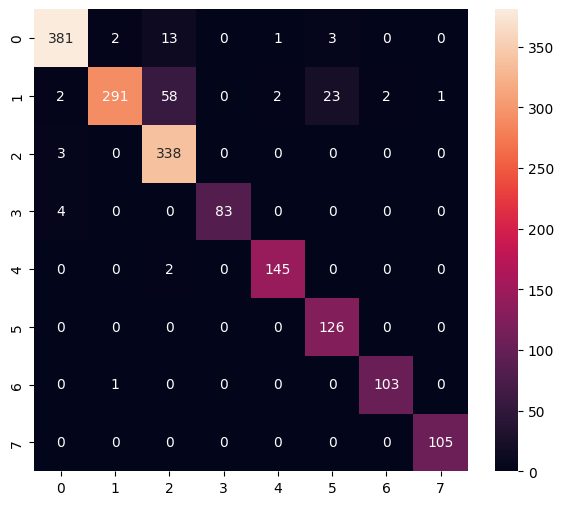

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       400
           1       0.99      0.77      0.86       379
           2       0.82      0.99      0.90       341
           3       1.00      0.95      0.98        87
           4       0.98      0.99      0.98       147
           5       0.83      1.00      0.91       126
           6       0.98      0.99      0.99       104
           7       0.99      1.00      1.00       105

    accuracy                           0.93      1689
   macro avg       0.95      0.96      0.95      1689
weighted avg       0.94      0.93      0.93      1689



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [16]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [ ]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

# Inference test

In [ ]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [ ]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [ ]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [ ]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

In [ ]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))